In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("biomarkers.csv")

biomarkers = list(df)

['k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_salivarius', 'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Subdoligranulum|s__Subdoligranulum_unclassified', 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum', 'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__Ruminococcus_torques', 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_ovatus', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_thermophilus', 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes_onderdonkii', 'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eubacteriaceae|g__Eubacterium|s__Eubacterium_ventriosum', 'k__Bacte

In [8]:
for index in range(len(biomarkers)-1):
    
    classification = biomarkers[index].split("|")
    genus = classification[5][3:]
    species = classification[6][3:][classification[6][3:].index("_")+1:]
    
    if len(classification)>7:
        strain = classification[7][3:]
        print(f"{index+1}: {genus} {species} ({strain})")
        
    else:
        print(f"{index+1}: {genus} {species}")

1: Streptococcus salivarius
2: Subdoligranulum unclassified
3: Bifidobacterium longum
4: Blautia torques
5: Bacteroides ovatus
6: Streptococcus thermophilus
7: Alistipes onderdonkii
8: Eubacterium ventriosum
9: Gemella sanguinis
10: Bacteroides xylanisolvens
11: Streptococcus sanguinis
12: Actinomyces odontolyticus
13: Eubacterium eligens
14: Veillonella parvula
15: Flavonifractor plautii
16: Parabacteroides unclassified
17: Escherichia coli
18: Bifidobacterium bifidum
19: Akkermansia muciniphila
20: Bacteroides plebeius (GCF_000187895)
21: Streptococcus thermophilus (Streptococcus_thermophilus_unclassified)
22: Eubacterium ventriosum (GCF_000153885)
23: Eubacterium eligens (GCF_000146185)
24: Methanobrevibacter smithii
25: Parabacteroides merdae
26: Pseudomonas unclassified
27: Clostridium leptum
28: Potyvirus mosaic_virus
29: Bacteroides intestinalis
30: Potyvirus mosaic_virus (PRJNA15388)
31: Gordonibacter pamelaeae
32: Bifidobacterium catenulatum
33: Clostridium citroniae
34: Metha

In [14]:
df = pd.read_csv("top_features.csv")

X = df.drop(labels="class", axis=1)
y = df["class"]

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [77]:
xgb = XGBClassifier(learning_rate=0.05, n_estimators=250, objective="binary:logistic")
xgb.fit(X_std, y)

importances = xgb.feature_importances_
features = []

for index in range(len(X.columns.tolist())):
    
    classification = X.columns.tolist()[index].split("|")
    genus = classification[5][3:]
    species = classification[6][3:][classification[6][3:].index("_")+1:]
    
    if len(classification)>7:
        strain = classification[7][3:]
        features.append(f"{genus} {species} ({strain})")
        
    else:
        features.append(f"{genus} {species}")
        
indices = np.argsort(importances)
features[1] = "Streptococcus bovis"
features[16] = "Helicobacter pylori"

sorted_feat = [features[i] for i in indices]
sorted_feat.reverse()
print(sorted_feat)

print(features)

['Streptococcus salivarius', 'Flavonifractor plautii', 'Escherichia coli', 'Veillonella parvula', 'Gordonibacter pamelaeae', 'Streptococcus bovis', 'Peptostreptococcus stomatis', 'Actinomyces odontolyticus', 'Eubacterium eligens', 'Bacteroides xylanisolvens', 'Bacteroides ovatus', 'Porphyromonas asaccharolytica', 'Clostridium symbiosum', 'Dialister invisus', 'Bacteroides intestinalis', 'Gemella morbillorum', 'Fusobacterium nucleatum', 'Helicobacter pylori', 'Potyvirus mosaic_virus', 'Bifidobacterium catenulatum']
['Streptococcus salivarius', 'Streptococcus bovis', 'Bacteroides ovatus', 'Bacteroides xylanisolvens', 'Actinomyces odontolyticus', 'Eubacterium eligens', 'Veillonella parvula', 'Flavonifractor plautii', 'Escherichia coli', 'Potyvirus mosaic_virus', 'Bacteroides intestinalis', 'Gordonibacter pamelaeae', 'Bifidobacterium catenulatum', 'Dialister invisus', 'Clostridium symbiosum', 'Gemella morbillorum', 'Helicobacter pylori', 'Fusobacterium nucleatum', 'Peptostreptococcus stomat

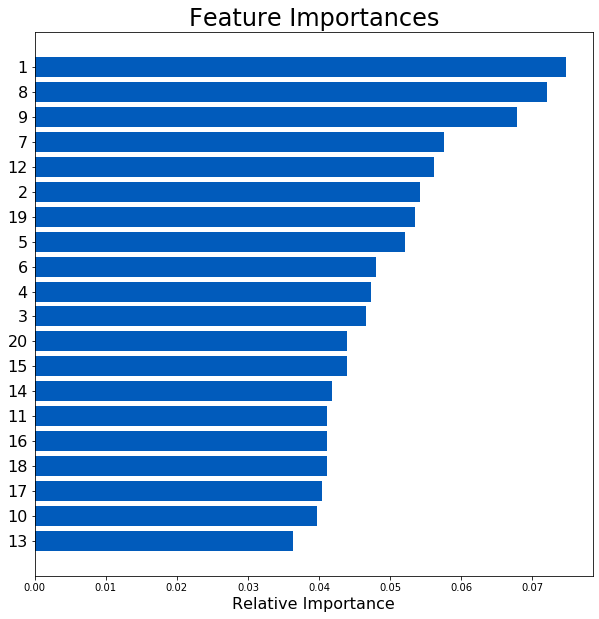

In [75]:
plt.figure(figsize=(10,10))
plt.title('Feature Importances', fontsize = 24)
plt.barh(range(len(indices)), importances[indices], color='#015bbb', align='center')
plt.yticks(range(len(indices)), indices+1, fontsize = 16)
plt.xlabel('Relative Importance', fontsize = 16)
plt.show()

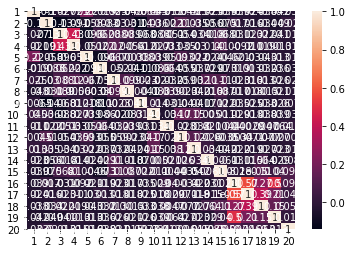

In [76]:
corrs = df.corr()
sns.heatmap(corr, xticklabels=[i+1 for i in range(len(indices))], yticklabels=[i+1 for i in range(len(indices))], annot=True)
 

In [47]:
from scipy.stats import spearmanr

coefs = []

for i in range(20):
    coef, _ = spearmanr(df.iloc[:,i], df.iloc[:,20])
    coefs.append(coef)
   
corrs["class"] = coefs

coefs = []


for i in range(21):
    coef, _ = spearmanr(df.iloc[:,20], df.iloc[:,i])
    coefs.append(coef)

corrs = pd.concat([corrs, pd.DataFrame(coefs)], ignore_index=True)

In [52]:
print(len(indices))

20


In [53]:
print(importances)
print(indices)

[0.07475995 0.05418381 0.04663923 0.0473251  0.0521262  0.04801098
 0.05761317 0.07201646 0.06790123 0.03978052 0.04115226 0.05624143
 0.03635117 0.04183814 0.04389575 0.04115226 0.04046639 0.04115226
 0.05349794 0.04389575]
[12  9 16 17 15 10 13 14 19  2  3  5  4 18  1 11  6  8  7  0]


In [59]:
np.savetxt("importances.csv", importances, delimiter=",", fmt='%f')

In [63]:
temp = pd.read_csv("importances.csv", header = None)
importance = temp[0].tolist()

print(importance)
indices = np.argsort(importances)



[0.07476000000000001, 0.054184, 0.046639, 0.047325, 0.052126, 0.048011, 0.057613, 0.072016, 0.067901, 0.039781, 0.041152, 0.056241, 0.036351, 0.041838, 0.043896, 0.041152, 0.040466, 0.041152, 0.053498000000000004, 0.043896]


In [64]:
print(indices+1)

[13 10 17 18 16 11 14 15 20  3  4  6  5 19  2 12  7  9  8  1]


In [65]:
print(indices)

[12  9 16 17 15 10 13 14 19  2  3  5  4 18  1 11  6  8  7  0]


In [67]:
print(features)
print(df.columns.values)

['Streptococcus salivarius', 'Streptococcus bovis', 'Bacteroides ovatus', 'Bacteroides xylanisolvens', 'Actinomyces odontolyticus', 'Eubacterium eligens', 'Veillonella parvula', 'Flavonifractor plautii', 'Escherichia coli', 'Potyvirus mosaic_virus', 'Bacteroides intestinalis', 'Gordonibacter pamelaeae', 'Bifidobacterium catenulatum', 'Dialister invisus', 'Clostridium symbiosum', 'Gemella morbillorum', 'Helicobacter pylori', 'Fusobacterium nucleatum', 'Peptostreptococcus stomatis', 'Porphyromonas asaccharolytica']
['k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_salivarius'
 'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Subdoligranulum|s__Subdoligranulum_unclassified'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_ovatus'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroid